In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from copy import deepcopy
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
datasetDict = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetDict[filename] = dirname+'/'+filename
# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Foundations/Project/cleaned_credit.csv')

In [3]:
df2 = deepcopy(df)
df

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
0,fully paid,445412.0,short term,709.0,1167493.0,6-10 years,home mortgage,home improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0
1,fully paid,211464.0,short term,741.0,2231892.0,6-10 years,own home,debt consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0
2,fully paid,347666.0,long term,721.0,806949.0,1-5 years,own home,debt consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0
3,fully paid,176220.0,short term,732.0,1175929.0,1-5 years,rent,debt consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0
4,charged off,206602.0,short term,729.0,896857.0,10+ years,home mortgage,debt consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80718,fully paid,210584.0,short term,719.0,783389.0,1-5 years,home mortgage,other,3727.61,17.4,6.0,0.0,456.0,259160.0
80719,fully paid,219472.0,short term,732.0,1289416.0,1-5 years,rent,debt consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0
80720,fully paid,103136.0,short term,742.0,1150545.0,6-10 years,rent,debt consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0
80721,fully paid,530332.0,short term,746.0,1717524.0,6-10 years,rent,debt consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0


In [4]:
df2.loc[df2['Number_of_Credit_Problems']>0, 'Number_of_Credit_Problems'] = 1
df2.loc[df2['Purpose']!='debt consolidation', 'Purpose'] = 'other'

For this task we should convert these continuous and discrete values into a range of 10 values so we could easily perform the task.

In [5]:
toBeConverted = ['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts', 'Current_Credit_Balance', 'Maximum_Open_Credit']
aRulesDf = df[toBeConverted]

enc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='quantile')
new_df = enc.fit_transform(aRulesDf)
converted = pd.DataFrame(new_df, columns=toBeConverted)

for col in toBeConverted:
    df2[col] = converted[col]

In [6]:
df2[toBeConverted] += 1
df2

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
0,fully paid,9.0,short term,3.0,6.0,6-10 years,home mortgage,other,1.0,6.0,2.0,1.0,6.0,5.0
1,fully paid,4.0,short term,8.0,10.0,6-10 years,own home,debt consolidation,9.0,4.0,10.0,1.0,7.0,8.0
2,fully paid,7.0,long term,5.0,3.0,1-5 years,own home,debt consolidation,3.0,2.0,5.0,0.0,7.0,5.0
3,fully paid,3.0,short term,6.0,6.0,1-5 years,rent,debt consolidation,7.0,1.0,9.0,0.0,7.0,5.0
4,charged off,4.0,short term,6.0,4.0,10+ years,home mortgage,debt consolidation,6.0,6.0,2.0,0.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80718,fully paid,4.0,short term,4.0,3.0,1-5 years,home mortgage,other,1.0,6.0,2.0,0.0,1.0,3.0
80719,fully paid,4.0,short term,6.0,6.0,1-5 years,rent,debt consolidation,4.0,1.0,10.0,0.0,4.0,6.0
80720,fully paid,1.0,short term,9.0,6.0,6-10 years,rent,debt consolidation,2.0,7.0,7.0,1.0,3.0,6.0
80721,fully paid,9.0,short term,10.0,9.0,6-10 years,rent,debt consolidation,3.0,4.0,4.0,0.0,9.0,8.0


Here we should convert it to dummies as the library we are using accepts only true or false values for the columns

In [7]:
df1 = pd.get_dummies(df2.astype(str))
df1

,Loan_Status_charged off,Loan_Status_fully paid,Current_Loan_Amount_1.0,Current_Loan_Amount_10.0,Current_Loan_Amount_2.0,Current_Loan_Amount_3.0,Current_Loan_Amount_4.0,Current_Loan_Amount_5.0,Current_Loan_Amount_6.0,Current_Loan_Amount_7.0,Current_Loan_Amount_8.0,Current_Loan_Amount_9.0,Term_long term,Term_short term,Credit_Score_1.0,Credit_Score_10.0,Credit_Score_2.0,Credit_Score_3.0,Credit_Score_4.0,Credit_Score_5.0,Credit_Score_6.0,Credit_Score_7.0,Credit_Score_8.0,Credit_Score_9.0,Annual_Income_1.0,Annual_Income_10.0,Annual_Income_2.0,Annual_Income_3.0,Annual_Income_4.0,Annual_Income_5.0,Annual_Income_6.0,Annual_Income_7.0,Annual_Income_8.0,Annual_Income_9.0,Years_in_current_job_1-5 years,Years_in_current_job_10+ years,Years_in_current_job_6-10 years,Years_in_current_job_< 1 year,Home_Ownership_home mortgage,Home_Ownership_own home,Home_Ownership_rent,Purpose_debt consolidation,Purpose_other,Monthly_Debt_1.0,Monthly_Debt_10.0,Monthly_Debt_2.0,Monthly_Debt_3.0,Monthly_Debt_4.0,Monthly_Debt_5.0,Monthly_Debt_6.0,Monthly_Debt_7.0,Monthly_Debt_8.0,Monthly_Debt_9.0,Years_of_Credit_History_1.0,Years_of_Credit_History_10.0,Years_of_Credit_History_2.0,Years_of_Credit_History_3.0,Years_of_Credit_History_4.0,Years_of_Credit_History_5.0,Years_of_Credit_History_6.0,Years_of_Credit_History_7.0,Years_of_Credit_History_8.0,Years_of_Credit_History_9.0,Number_of_Open_Accounts_1.0,Number_of_Open_Accounts_10.0,Number_of_Open_Accounts_2.0,Number_of_Open_Accounts_3.0,Number_of_Open_Accounts_4.0,Number_of_Open_Accounts_5.0,Number_of_Open_Accounts_6.0,Number_of_Open_Accounts_7.0,Number_of_Open_Accounts_8.0,Number_of_Open_Accounts_9.0,Number_of_Credit_Problems_0.0,Number_of_Credit_Problems_1.0,Current_Credit_Balance_1.0,Current_Credit_Balance_10.0,Current_Credit_Balance_2.0,Current_Credit_Balance_3.0,Current_Credit_Balance_4.0,Current_Credit_Balance_5.0,Current_Credit_Balance_6.0,Current_Credit_Balance_7.0,Current_Credit_Balance_8.0,Current_Credit_Balance_9.0,Maximum_Open_Credit_1.0,Maximum_Open_Credit_10.0,Maximum_Open_Credit_2.0,Maximum_Open_Credit_3.0,Maximum_Open_Credit_4.0,Maximum_Open_Credit_5.0,Maximum_Open_Credit_6.0,Maximum_Open_Credit_7.0,Maximum_Open_Credit_8.0,Maximum_Open_Credit_9.0
0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80718,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
80719,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
80720,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

# Association Rules Mining

A bit of explanations:
### Support
Support indicates how many times the itemset appears in the dataset. 
For example if we have 5 items in the dataset and let's say {fully_paid, credit_score = 700} appears only one time, it means it's support it's going to be 0.2 or 1/5.
### Confidence
Confidence indicates how many times a certain rule has been confirmed to be true.
For example let's say that the rule we are considering is {credit_score = 700, term = short} and the cause is {fully_paid}.
Let's consider {credit_score = 700, term = short} as X and {fully_paid} as Y. 
To calculate this we have to divide the support of X and Y with the support of X.
So if for example it is 0.1/0.1, the confidence it's going to be 1, meaning that 100% of the time, if we see 700 as the credit score and the term to be short, then the loan has been fully paid.
### Lift
Lift deals with the dependences of the rules, and it's calculated as support of X and Y / support of X * the support of Y. 
If the lift is equal to 1, it means that X and Y are independent in occurance, and that no rule can be drawn from them, but if lift is > 1 it means that they are dependent at some degree, and the bigger lifts gets, the bigger the dependance of X and Y becomes.

## Frequent patterns extraction with different values of support and different types

Let's explore what happens with the frequent itemsets when we change the min support values

In [8]:
pd.set_option('display.max_colwidth', -1)
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    frequent_itemsets = apriori(df1, min_support=i, use_colnames=True)
    print('_______________')
    print(f'Frequent itemsets with min support {i}')
    print(frequent_itemsets)
    print('_______________')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


_______________
Frequent itemsets with min support 0.2
     support                                                                                                           itemsets
0   0.251465  (Loan_Status_charged off)                                                                                        
1   0.748535  (Loan_Status_fully paid)                                                                                         
2   0.252022  (Term_long term)                                                                                                 
3   0.747978  (Term_short term)                                                                                                
4   0.389951  (Years_in_current_job_1-5 years)                                                                                 
5   0.316130  (Years_in_current_job_10+ years)                                                                                 
6   0.208330  (Years_in_current_job_6-10 years)  

_______________
Frequent itemsets with min support 0.7
    support                         itemsets
0  0.748535  (Loan_Status_fully paid)       
1  0.747978  (Term_short term)              
2  0.794321  (Purpose_debt consolidation)   
3  0.860672  (Number_of_Credit_Problems_0.0)
_______________


In [9]:
sup = []
sup_2 = []
sup_3 = []
min_sup = []
for i in range(1,11):
    frequent_itemsets = apriori(df1, min_support=i/10, use_colnames=True)
    sup.append(len(frequent_itemsets))
    min_sup.append(i/10)
    frequent_itemsets_2 = apriori(df1, min_support=i/10, max_len=2, use_colnames=True)
    sup_2.append(len(frequent_itemsets_2))
    frequent_itemsets_3 = apriori(df1, min_support=i/10, max_len=3, use_colnames=True)
    sup_3.append(len(frequent_itemsets_3))

In [10]:
a = []
b = []
for i in range(0,len(sup)):
    a.append(sup[i]-sup_3[i])
    b.append(sup[i]-sup_2[i])

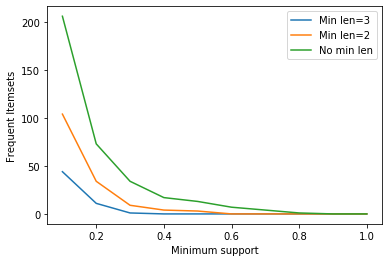

In [11]:
plt.plot(min_sup, a, label='Min len=3')
plt.plot(min_sup, b, label='Min len=2')
plt.plot(min_sup, sup, label='No min len')
plt.xlabel('Minimum support')
plt.ylabel('Frequent Itemsets')
plt.legend()
plt.show()

## Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter

Of course the more the min support grows the less itemsets we have. That's logical.
We see a high correlation between no credit problems and no tax liens, and that's also logical. 
We also see that (Tax_Liens_0.0, Number_of_Credit_Problems_0.0, Loan_Status_fully paid, Purpose_debt consolidation) has a support of 0.51, while  0.643215  (Number_of_Credit_Problems_0.0, Tax_Liens_0.0, Loan_Status_fully paid) is 0.64, meaning that only 13% of the cases the debt purpose of (Number_of_Credit_Problems_0.0, Tax_Liens_0.0, Loan_Status_fully paid) is for some purpose other than debt consolidation.

##  Association rules extraction with different values of confidence


In [12]:
frequent_itemsets_01 = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets_02 = apriori(df1, min_support=0.2, use_colnames=True)
frequent_itemsets_03 = apriori(df1, min_support=0.3, use_colnames=True)

In [13]:
conf_01 = []
conf_02 = []
conf_03 = []
threshold = []
for i in range(2,11):
    confidence = association_rules(frequent_itemsets_01, metric="confidence", min_threshold=i/10)
    conf_01.append(len(confidence))
    confidence = association_rules(frequent_itemsets_02, metric="confidence", min_threshold=i/10)
    conf_02.append(len(confidence))
    confidence = association_rules(frequent_itemsets_03, metric="confidence", min_threshold=i/10)
    conf_03.append(len(confidence))
    threshold.append(i/10)

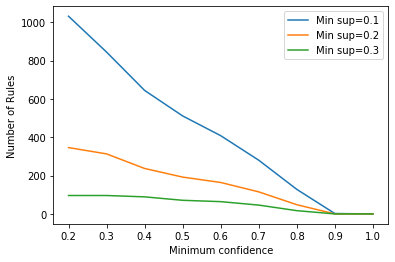

In [14]:
plt.plot(threshold, conf_01, label='Min sup=0.1')
plt.plot(threshold, conf_02, label='Min sup=0.2')
plt.plot(threshold, conf_03, label='Min sup=0.3')
plt.legend()
plt.xlabel('Minimum confidence')
plt.ylabel('Number of Rules')
plt.show()

Wee will choose 0.2 for the mean support to see more rules been drawed.

In [15]:
frequent_itemsets = apriori(df1, min_support=0.2, use_colnames=True)

In [16]:
confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Loan_Status_charged off),(Number_of_Credit_Problems_0.0),0.251465,0.860672,0.216320,0.860239,0.999498,-0.000109,0.996907
1,(Loan_Status_fully paid),(Number_of_Credit_Problems_0.0),0.748535,0.860672,0.644352,0.860817,1.000169,0.000109,1.001043
2,(Term_long term),(Purpose_debt consolidation),0.252022,0.794321,0.208491,0.827271,1.041481,0.008304,1.190759
3,(Term_long term),(Number_of_Credit_Problems_0.0),0.252022,0.860672,0.220408,0.874558,1.016134,0.003500,1.110696
4,(Home_Ownership_rent),(Term_short term),0.437273,0.747978,0.349987,0.800385,1.070066,0.022916,1.262544
5,(Term_short term),(Number_of_Credit_Problems_0.0),0.747978,0.860672,0.640264,0.855993,0.994564,-0.003500,0.967511
6,(Years_in_current_job_1-5 years),(Number_of_Credit_Problems_0.0),0.389951,0.860672,0.341687,0.876231,1.018078,0.006067,1.125713
7,(Years_in_current_job_10+ years),(Purpose_debt consolidation),0.316130,0.794321,0.257832,0.815588,1.026774,0.006723,1.115324
8,(Years_in_current_job_10+ years),(Number_of_Credit_Problems_0.0),0.316130,0.860672,0.264968,0.838160,0.973844,-0.007117,0.860901
9,(Home_Ownership_home mortgage),(Number_of_Credit_Problems_0.0),0.474078,0.860672,0.405808,0.855993,0.994564,-0.002218,0.967511


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.12)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Home_Ownership_rent),(Years_in_current_job_1-5 years),0.437273,0.389951,0.201690,0.461244,1.182827,0.031175,1.132330
1,(Years_in_current_job_1-5 years),(Home_Ownership_rent),0.389951,0.437273,0.201690,0.517218,1.182827,0.031175,1.165593
2,"(Loan_Status_fully paid, Home_Ownership_rent)","(Purpose_debt consolidation, Term_short term)",0.316490,0.585831,0.211786,0.669172,1.142262,0.026377,1.251917
3,"(Purpose_debt consolidation, Term_short term)","(Loan_Status_fully paid, Home_Ownership_rent)",0.585831,0.316490,0.211786,0.361514,1.142262,0.026377,1.070517
4,"(Loan_Status_fully paid, Home_Ownership_rent)","(Number_of_Credit_Problems_0.0, Term_short term)",0.316490,0.640264,0.228597,0.722287,1.128109,0.025960,1.295355
5,"(Number_of_Credit_Problems_0.0, Term_short term)","(Loan_Status_fully paid, Home_Ownership_rent)",0.640264,0.316490,0.228597,0.357035,1.128109,0.025960,1.063060


##  Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift


We see that the lift determines a lot on the usefulness of the rules, with lift 1.1 we have houndreads of rules, while with 1.2 we have only 15 rules which look promising. Even if some of them are duplicates, meaning that the antecedents and consequents are just switched. 

With a staggering 72% (Home_Ownership_rent, Credit_Score_10.0)	(Term_short term, Purpose_debt consolidation) tells us that most tenants choose as their debt purpose a debt consolidation.
Also 63% of (Home_Ownership_home mortgage, Term_short term)	(Credit_Score_10.0, Loan_Status_fully paid)	tells us that those who have a credit score in the best 10% and have repaid their loan, have a mortgage and their loan was short term.

Text(0.5, 1.0, 'Confidence')

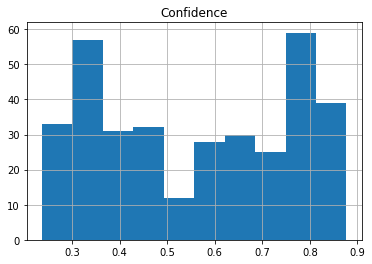

In [18]:
confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
confidence.hist('confidence')
plt.title('Confidence')

Text(0.5, 1.0, 'Lift')

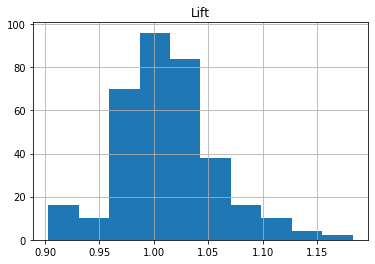

In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rules.hist('lift')
plt.title('Lift')

## Use the most meaningful rules to replace missing values and evaluate the accuracy****


We have already replaced missing values, as they don't cause a problem in our dataset.

In [20]:
pred_rules = rules[(rules['consequents']==frozenset({('Loan_Status_fully paid')})) & (rules.lift>1) & (rules.confidence>0.782)]

In [21]:
pred_rules.reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,56,"(Term_short term, Years_in_current_job_1-5 years)",(Loan_Status_fully paid),0.302405,0.748535,0.236859,0.783253,1.046382,0.010499,1.160179
1,62,"(Term_short term, Home_Ownership_home mortgage)",(Loan_Status_fully paid),0.330686,0.748535,0.268759,0.812729,1.085760,0.021228,1.342789
2,74,"(Purpose_debt consolidation, Term_short term)",(Loan_Status_fully paid),0.585831,0.748535,0.458630,0.782872,1.045872,0.020115,1.158139
3,80,"(Number_of_Credit_Problems_0.0, Term_short term)",(Loan_Status_fully paid),0.640264,0.748535,0.500911,0.782350,1.045175,0.021651,1.155366
4,195,"(Number_of_Credit_Problems_0.0, Term_short term, Years_in_current_job_1-5 years)",(Loan_Status_fully paid),0.264584,0.748535,0.207475,0.784156,1.047587,0.009425,1.165030
5,209,"(Purpose_debt consolidation, Term_short term, Home_Ownership_home mortgage)",(Loan_Status_fully paid),0.255280,0.748535,0.207896,0.814383,1.087970,0.016810,1.354755
6,223,"(Number_of_Credit_Problems_0.0, Term_short term, Home_Ownership_home mortgage)",(Loan_Status_fully paid),0.280180,0.748535,0.228175,0.814387,1.087975,0.018451,1.354784
7,265,"(Number_of_Credit_Problems_0.0, Purpose_debt consolidation, Term_short term)",(Loan_Status_fully paid),0.500948,0.748535,0.392924,0.784361,1.047862,0.017947,1.166140


## Use the most meaningful rules to predict the target variable and evaluate the accuracy

We will use these sets of rules to evaluate the accuracy

(Purpose_debt consolidation, Term_short term)	(Loan_Status_fully paid, Home_Ownership_rent)	
(Number_of_Credit_Problems_0.0, Term_short term)	(Loan_Status_fully paid, Home_Ownership_rent)

In [22]:
df['prediction'] = 'charged off'
df['accuracy'] = np.where(df['Loan_Status'] == df['prediction'], 1, 0)
pre = len(df[df['accuracy'] == 1])/len(df)
print(1-pre)

df.loc[(df["Years_in_current_job"] == '1-5 years') & (df["Term"] == 'short term'), "prediction"] = 'fully paid'
df.loc[(df["Home_Ownership"] == 'home mortgage') & (df["Term"] == 'short term'), "prediction"] = 'fully paid'
df.loc[(df["Purpose"] == 'debt consolidation') & (df["Term"] == 'short term'), "prediction"] = 'fully paid'
df.loc[(df["Number_of_Credit_Problems"] == 0.0) & (df["Term"] == 'short term'), "prediction"] = 'fully paid'

df['accuracy'] = np.where(df['Loan_Status'] == df['prediction'], 1, 0)
post =len(df[df['accuracy'] == 1])/len(df)
print(post)

0.7485351139080559
0.6690410415866606


In [23]:
df[(df['accuracy'] == 1) & (df.prediction=='fully paid')]

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,prediction,accuracy
0,fully paid,445412.0,short term,709.0,1167493.0,6-10 years,home mortgage,home improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,fully paid,1
1,fully paid,211464.0,short term,741.0,2231892.0,6-10 years,own home,debt consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,fully paid,1
3,fully paid,176220.0,short term,732.0,1175929.0,1-5 years,rent,debt consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,fully paid,1
5,fully paid,217646.0,short term,730.0,1184194.0,< 1 year,home mortgage,debt consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,fully paid,1
7,fully paid,548746.0,short term,678.0,2559110.0,1-5 years,rent,debt consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,fully paid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80718,fully paid,210584.0,short term,719.0,783389.0,1-5 years,home mortgage,other,3727.61,17.4,6.0,0.0,456.0,259160.0,fully paid,1
80719,fully paid,219472.0,short term,732.0,1289416.0,1-5 years,rent,debt consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,fully paid,1
80720,fully paid,103136.0,short term,742.0,1150545.0,6-10 years,rent,debt consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,fully paid,1
80721,fully paid,530332.0,short term,746.0,1717524.0,6-10 years,rent,debt consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,fully paid,1


In [24]:
df[(df['accuracy'] == 1) & (df.prediction=='charged off')]

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,prediction,accuracy
6,charged off,648714.0,long term,699.0,2134175.0,< 1 year,home mortgage,buy house,14806.13,8.2,15.0,0.0,193306.0,864204.0,charged off,1
15,charged off,653004.0,long term,680.0,2960998.0,6-10 years,home mortgage,debt consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,charged off,1
18,charged off,317108.0,long term,687.0,1133274.0,6-10 years,rent,debt consolidation,9632.81,17.4,4.0,0.0,60287.0,126940.0,charged off,1
37,charged off,688468.0,long term,682.0,1494616.0,< 1 year,rent,debt consolidation,14697.07,16.6,8.0,0.0,343995.0,843854.0,charged off,1
46,charged off,219692.0,long term,661.0,527839.0,10+ years,rent,debt consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,charged off,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80667,charged off,548548.0,long term,659.0,1412745.0,10+ years,home mortgage,debt consolidation,18365.78,19.5,15.0,0.0,730246.0,1595352.0,charged off,1
80683,charged off,436744.0,long term,725.0,1866731.0,10+ years,home mortgage,home improvements,20378.26,15.9,8.0,0.0,379620.0,739992.0,charged off,1
80688,charged off,205458.0,long term,694.0,1681101.0,6-10 years,rent,business loan,14877.76,10.5,8.0,0.0,259844.0,527846.0,charged off,1
80689,charged off,486046.0,long term,695.0,1440827.0,6-10 years,home mortgage,debt consolidation,33979.22,33.5,18.0,0.0,633631.0,937024.0,charged off,1


In [25]:
df[(df['accuracy'] == 0) & (df.prediction=='fully paid')]

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,prediction,accuracy
4,charged off,206602.0,short term,729.0,896857.0,10+ years,home mortgage,debt consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,fully paid,0
20,charged off,153252.0,short term,714.0,1890690.0,1-5 years,rent,debt consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,fully paid,0
29,charged off,130174.0,short term,733.0,524609.0,< 1 year,rent,debt consolidation,9311.71,15.4,7.0,1.0,130701.0,268818.0,fully paid,0
35,charged off,259842.0,short term,736.0,2489760.0,6-10 years,home mortgage,debt consolidation,11792.73,20.6,9.0,0.0,401584.0,708818.0,fully paid,0
40,charged off,288948.0,short term,712.0,537472.0,10+ years,rent,debt consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,fully paid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80698,charged off,380204.0,short term,728.0,1046805.0,6-10 years,own home,debt consolidation,32625.28,16.9,8.0,0.0,268964.0,415800.0,fully paid,0
80704,charged off,274076.0,short term,736.0,709650.0,10+ years,rent,debt consolidation,4204.70,35.3,13.0,0.0,102866.0,844712.0,fully paid,0
80710,charged off,666666.0,short term,725.0,3838380.0,6-10 years,home mortgage,debt consolidation,48939.44,12.4,18.0,0.0,507414.0,1004322.0,fully paid,0
80714,charged off,309474.0,short term,719.0,1708252.0,10+ years,home mortgage,debt consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,fully paid,0


In [26]:
df[(df['accuracy'] == 0) & (df.prediction=='charged off')]

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,prediction,accuracy
2,fully paid,347666.0,long term,721.0,806949.0,1-5 years,own home,debt consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,charged off,0
14,fully paid,449020.0,long term,724.0,974662.0,6-10 years,own home,debt consolidation,18904.81,19.4,8.0,0.0,334533.0,428956.0,charged off,0
22,fully paid,244926.0,long term,704.0,1249953.0,1-5 years,home mortgage,debt consolidation,6812.26,14.4,6.0,1.0,143051.0,245014.0,charged off,0
23,fully paid,465410.0,long term,688.0,1722654.0,1-5 years,rent,buy house,15647.45,22.3,7.0,0.0,107559.0,488356.0,charged off,0
30,fully paid,333564.0,long term,725.0,1248338.0,10+ years,home mortgage,debt consolidation,18205.04,14.6,18.0,0.0,300979.0,515526.0,charged off,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80693,fully paid,263648.0,long term,735.0,1111918.0,1-5 years,own home,debt consolidation,20755.79,29.5,18.0,0.0,302290.0,1054284.0,charged off,0
80699,fully paid,100254.0,long term,705.0,1032004.0,6-10 years,rent,debt consolidation,20124.04,20.0,4.0,0.0,354065.0,468006.0,charged off,0
80702,fully paid,328350.0,long term,704.0,2041740.0,1-5 years,rent,other,32684.94,16.7,9.0,0.0,120612.0,234322.0,charged off,0
80707,fully paid,431860.0,long term,742.0,1326143.0,10+ years,home mortgage,debt consolidation,8465.07,18.5,5.0,0.0,241319.0,476806.0,charged off,0
